Rong Wang, rongwww, 1619779944

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import math
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')


(b). Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

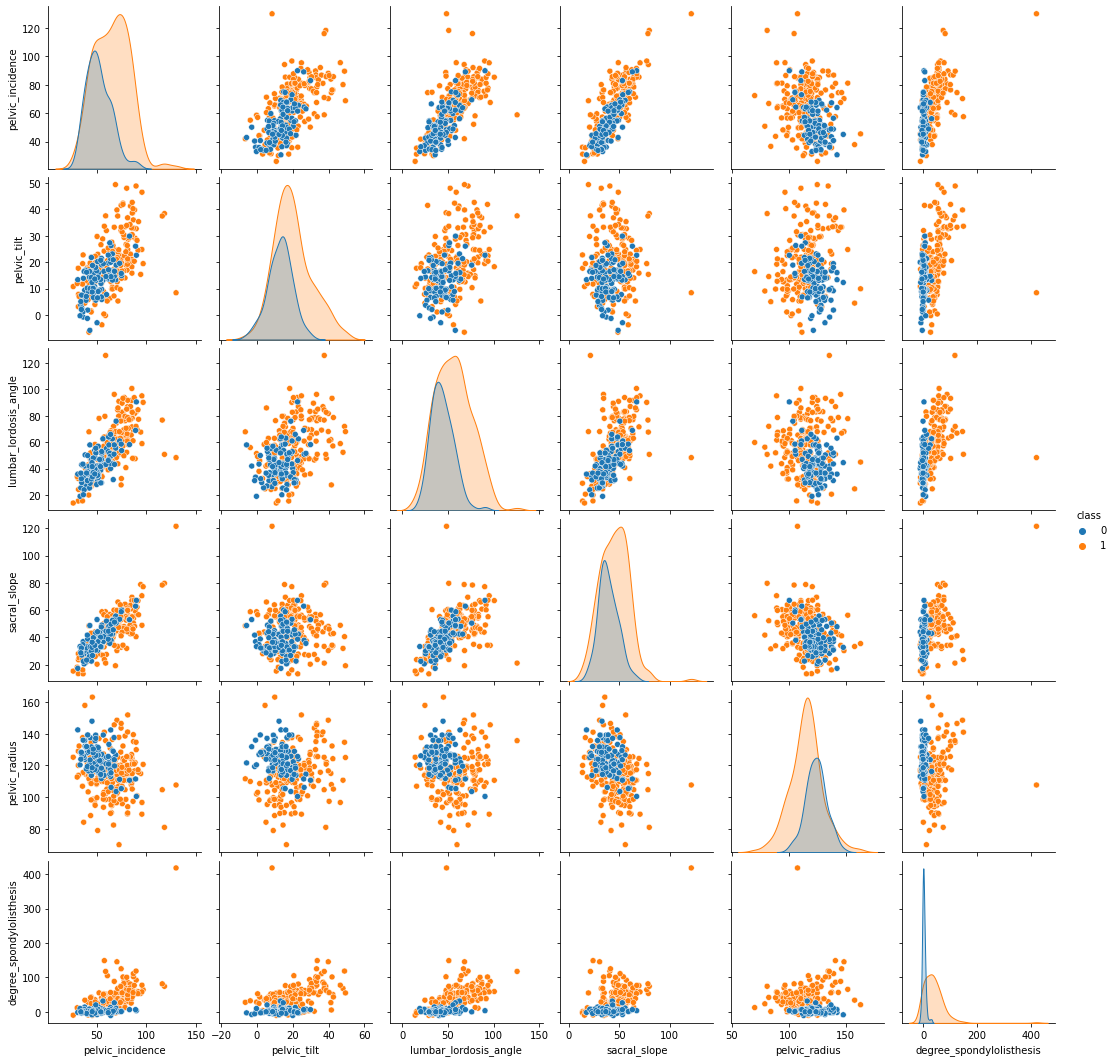

In [291]:
# load data
data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.replace(b'Abnormal', 1, inplace=True)
df.replace(b'Normal', 0, inplace=True)
# df.head()ha

# plot
sns.pairplot(df, hue="class")



ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1.

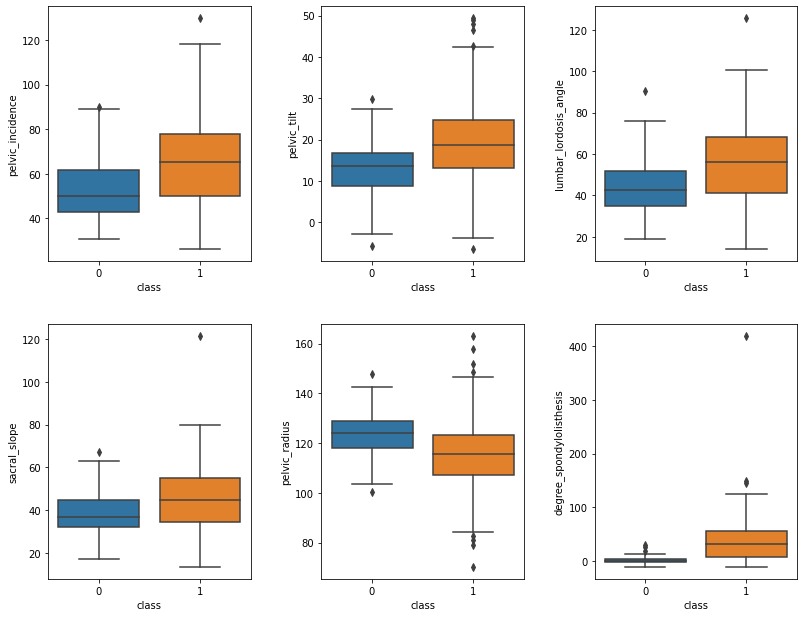

In [292]:
plt.figure(figsize=(13, 10))
# plt.suptitle('boxplots for each of the independent variables')
plt.subplot(231)
sns.boxplot(x="class", y="pelvic_incidence", data=df)
plt.subplot(232)
sns.boxplot(x="class", y="pelvic_tilt", data=df)
plt.subplot(233)
sns.boxplot(x="class", y="lumbar_lordosis_angle", data=df)
plt.subplot(234)
sns.boxplot(x="class", y="sacral_slope", data=df)
plt.subplot(235)
sns.boxplot(x="class", y="pelvic_radius", data=df)
plt.subplot(236)
sns.boxplot(x="class", y="degree_spondylolisthesis", data=df)
plt.subplots_adjust(top=0.92, left=0.10, hspace=0.25, wspace=0.35)
plt.show()

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [293]:
no_data = df[df['class'] == 0] # integer 0, not string 0
ab_data = df[df['class'] == 1]
                         
training_set=(ab_data.iloc[0:140]).append(no_data.iloc[0:70])
testing_set=(ab_data.iloc[140:]).append(no_data.iloc[70:])

# training_set
# testing_set
# print(training_set)
# print(testing_set)


(c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.

Best k of Euclidean: [4]
Minimum Test Error Rate: 0.06000000000000005
Minimum Train Error Rate: 0.0


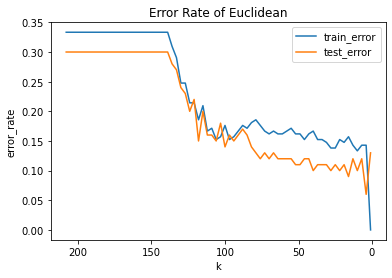

In [294]:
k_list = []
test_error = []
train_error = []
min_k = []
min_error_Euclidean = 1
min_train_error = 1

features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

for k in range(208, 0, -3):
    Euclidean_model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    Euclidean_model.fit(training_set[features], training_set["class"])
    Euclidean_pred_test = Euclidean_model.predict(testing_set[features])
    Euclidean_pred_train = Euclidean_model.predict(training_set[features])
    
    error_rate_test = 1-accuracy_score(testing_set[["class"]], Euclidean_pred_test)
    error_rate_train = 1-accuracy_score(training_set[["class"]], Euclidean_pred_train)
    k_list.append(k)
    test_error.append(error_rate_test)
    train_error.append(error_rate_train)
    if error_rate_test < min_error_Euclidean:
        min_error_Euclidean = error_rate_test
        min_k = [k]
    elif error_rate_test == min_error_Euclidean:
        min_k.append(k) # may have more than 1 min k.
    if error_rate_train < min_train_error:
        min_train_error = error_rate_train

print('Best k of Euclidean:', min_k)
print('Minimum Test Error Rate:', min_error_Euclidean)
print('Minimum Train Error Rate:', min_train_error)

# plot
plt.title('Error Rate of Euclidean')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(k_list, train_error, label = 'train_error')
plt.plot(k_list, test_error, label = 'test_error')
plt.legend()
plt.show()

In [295]:
# when k = 4
Euclidean_model = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')
Euclidean_model.fit(training_set[features], training_set["class"]) # use train_set["class"], not train_set[["class"]]
pred_test_4 = Euclidean_model.predict(testing_set[features])
# Confusion Matrix
Euclidean_confusion_matrix = confusion_matrix(testing_set[["class"]], pred_test_4)
tn, fp, fn, tp = Euclidean_confusion_matrix.ravel()
TPR = tp/(tp+fn)
TNR = tn/(tn+fp)
P = tp/(tp+fp) # precision_score(testing_set[["class"]], pred_test_4)
R = tp/(tp+fn)
f1 = 2*(P*R)/(P+R)

print('Confusion Matrix: \n', Euclidean_confusion_matrix)
print('True positive rate: ', TPR)
print('True negative rate: ', TNR)
print('Precision: ', P)
print('F1-score: ', f1)
print()
print(classification_report(testing_set[["class"]], pred_test_4))

Confusion Matrix: 
 [[25  5]
 [ 1 69]]
True positive rate:  0.9857142857142858
True negative rate:  0.8333333333333334
Precision:  0.9324324324324325
F1-score:  0.9583333333333333

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}.4 Note: for each N, select your training set by choosing the first N/3 rows of Class 0 and the first N − N/3 rows of Class 1 in the training set you created in ??. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

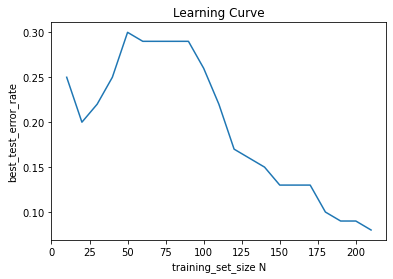

In [296]:
n_list= []
test_error = []

training_set=(ab_data.iloc[0:140]).append(no_data.iloc[0:70])
# testing_set=(ab_data.iloc[140:]).append(no_data.iloc[70:])


for n in range(10, 211, 10):
    n_list.append(n)
    NO_count = n // 3
    AB_count = n - NO_count
    train_data = (ab_data.iloc[0:AB_count]).append(no_data.iloc[0:NO_count])
    train_X = train_data[features]
    train_Y = train_data["class"]

    min_error_rate = 1 # keep record of the min error rate for each different n.
    
    for k in range(1, n, 5):
        KNN = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        KNN.fit(train_X[features], train_Y)
        pred_test = KNN.predict(testing_set[features])
        error_rate = 1 - accuracy_score(testing_set[["class"]], pred_test)
        if error_rate < min_error_rate:
            min_error_rate = error_rate
            
    test_error.append(min_error_rate)
    
plt.title('Learning Curve')
plt.xlabel('training_set_size N')
plt.ylabel('best_test_error_rate')
plt.plot(n_list, test_error)


(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k*) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

i. Minkowski Distance: 

A. which becomes Manhattan Distance with p = 1.

Best k of Manhattan: [1, 6, 11, 26]
Minimum Test Error Rate: 0.10999999999999999
Minimum Train Error Rate: 0.0


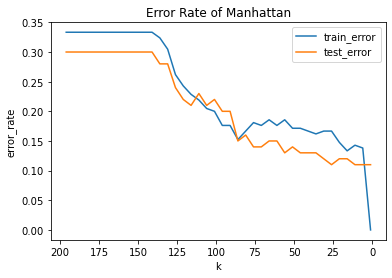

In [297]:
k_list = []
test_error = []
train_error = []
min_k = []
min_error_Manhattan = 1
min_train_error = 1

features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

for k in range(1, 197, 5):
    Manhattan_model = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan')
    Manhattan_model.fit(training_set[features], training_set["class"])
    Manhattan_pred_test = Manhattan_model.predict(testing_set[features])
    Manhattan_pred_train = Manhattan_model.predict(training_set[features])
    
    error_rate_test = 1-accuracy_score(testing_set[["class"]], Manhattan_pred_test)
    error_rate_train = 1-accuracy_score(training_set[["class"]], Manhattan_pred_train)
    k_list.append(k)
    test_error.append(error_rate_test)
    train_error.append(error_rate_train)
    if error_rate_test < min_error_Manhattan:
        min_error_Manhattan = error_rate_test
        min_k = [k]
    elif error_rate_test == min_error_Manhattan:
        min_k.append(k) # may have more than 1 min k.
    if error_rate_train < min_train_error:
        min_train_error = error_rate_train

print('Best k of Manhattan:', min_k)
print('Minimum Test Error Rate:', min_error_Manhattan)
print('Minimum Train Error Rate:', min_train_error)

# plot
plt.title('Error Rate of Manhattan')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(k_list, train_error, label = 'train_error')
plt.plot(k_list, test_error, label = 'test_error')
plt.legend()
plt.show()

B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k* you found for the Manhattan distance in ??. What is the best log10(p)? 

Best log when k=26: [0.1, 0.2, 0.4, 0.6]
Minimum Test Error Rate: 0.09999999999999998
Minimum Train Error Rate: 0.13809523809523805


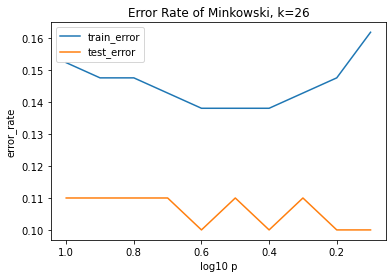

In [298]:
# choose k = 26.

log_list = []
test_error = []
train_error = []
min_k = []
min_error_Manhattan_log = 1
min_train_error = 1

features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

log = 0.1
while log <= 1:
    Manhattan_model = KNeighborsClassifier(n_neighbors = 26, metric = 'minkowski', p = math.pow(10,log))
    Manhattan_model.fit(training_set[features], training_set["class"])
    Manhattan_pred_test = Manhattan_model.predict(testing_set[features])
    Manhattan_pred_train = Manhattan_model.predict(training_set[features])
    
    error_rate_test = 1-accuracy_score(testing_set[["class"]], Manhattan_pred_test)
    error_rate_train = 1-accuracy_score(training_set[["class"]], Manhattan_pred_train)
    log_list.append(log)
    test_error.append(error_rate_test)
    train_error.append(error_rate_train)
    if error_rate_test < min_error_Manhattan_log:
        min_error_Manhattan_log = error_rate_test
        min_k = [log]
    elif error_rate_test == min_error_Manhattan_log:
        min_k.append(log) # may have more than 1 min k.
    if error_rate_train < min_train_error:
        min_train_error = error_rate_train
    
    log += 0.1

print('Best log when k=26:', min_k)
print('Minimum Test Error Rate:', min_error_Manhattan_log)
print('Minimum Train Error Rate:', min_train_error)

# plot
plt.title('Error Rate of Minkowski, k=26')
plt.xlabel('log10 p')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(log_list, train_error, label = 'train_error')
plt.plot(log_list, test_error, label = 'test_error')
plt.legend()
plt.show()


C. which becomes Chebyshev Distance with p → ∞

Best k of Chebyshev: [16]
Minimum Test Error Rate: 0.07999999999999996
Minimum Train Error Rate: 0.0


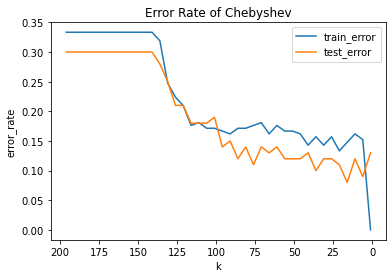

In [299]:
k_list = []
test_error = []
train_error = []
min_k = []
min_error_Chebyshev = 1
min_train_error = 1

features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

for k in range(1, 197, 5):
    Chebyshev_model = KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev')
    Chebyshev_model.fit(training_set[features], training_set["class"])
    Chebyshev_pred_test = Chebyshev_model.predict(testing_set[features])
    Chebyshev_pred_train = Chebyshev_model.predict(training_set[features])
    
    error_rate_test = 1-accuracy_score(testing_set[["class"]], Chebyshev_pred_test)
    error_rate_train = 1-accuracy_score(training_set[["class"]], Chebyshev_pred_train)
    k_list.append(k)
    test_error.append(error_rate_test)
    train_error.append(error_rate_train)
    if error_rate_test < min_error_Chebyshev:
        min_error_Chebyshev = error_rate_test
        min_k = [k]
    elif error_rate_test == min_error_Chebyshev:
        min_k.append(k) # may have more than 1 min k.
    if error_rate_train < min_train_error:
        min_train_error = error_rate_train

print('Best k of Chebyshev:', min_k)
print('Minimum Test Error Rate:', min_error_Chebyshev)
print('Minimum Train Error Rate:', min_train_error)

# plot
plt.title('Error Rate of Chebyshev')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(k_list, train_error, label = 'train_error')
plt.plot(k_list, test_error, label = 'test_error')
plt.legend()
plt.show()

ii. Mahalanobis Distance.

Best k of Mahalanobis: [16]
Minimum Test Error Rate: 0.17000000000000004
Minimum Train Error Rate: 0.042857142857142816


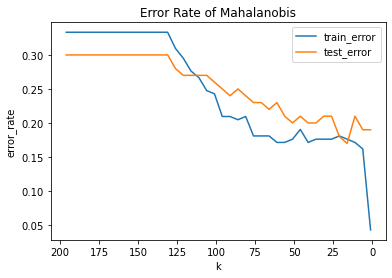

In [300]:
k_list = []
test_error = []
train_error = []
min_k = []
min_error_Mahalanobis = 1
min_train_error = 1

# training_set_X = np.array(training_set[features].to_records(index = False).tolist())
# cov = np.cov(training_set_X, rowvar = False)

features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']
cov = np.cov(training_set[features], rowvar = False) # pass a square matrix into the model
inv_covmat = np.linalg.inv(cov)


for k in range(1, 197, 5):    
#     Mahalanobis_model = KNeighborsClassifier(n_neighbors = k, metric = 'mahalanobis', metric_params = {'VI': cov, rowvar = False)})
    Mahalanobis_model = KNeighborsClassifier(n_neighbors = k, metric = 'mahalanobis', metric_params = {'VI': inv_covmat})
    Mahalanobis_model.fit(training_set[features], training_set["class"])
    Mahalanobis_pred_test = Mahalanobis_model.predict(testing_set[features])
    Mahalanobis_pred_train = Mahalanobis_model.predict(training_set[features])
    
    error_rate_test = 1-accuracy_score(testing_set[["class"]], Mahalanobis_pred_test)
    error_rate_train = 1-accuracy_score(training_set[["class"]], Mahalanobis_pred_train)
    k_list.append(k)
    test_error.append(error_rate_test)
    train_error.append(error_rate_train)
    if error_rate_test < min_error_Mahalanobis:
        min_error_Mahalanobis = error_rate_test
        min_k = [k]
    elif error_rate_test == min_error_Mahalanobis:
        min_k.append(k) # may have more than 1 min k.
    if error_rate_train < min_train_error:
        min_train_error = error_rate_train

print('Best k of Mahalanobis:', min_k)
print('Minimum Test Error Rate:', min_error_Mahalanobis)
print('Minimum Train Error Rate:', min_train_error)

# plot
plt.title('Error Rate of Mahalanobis')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(k_list, train_error, label = 'train_error')
plt.plot(k_list, test_error, label = 'test_error')
plt.legend()
plt.show()


Summarize the test errors (i.e., when k = k*) in a table.

In [301]:
d_compare = {
    'Metric':['Euclidean','Manhattan','Minkowski (k=26)','Chebyshev','Mahalanobis'],
    'Best Test Error': [min_error_Euclidean, min_error_Manhattan, min_error_Manhattan_log, min_error_Chebyshev, min_error_Mahalanobis]
}
pd.DataFrame(d_compare)

,Metric,Best Test Error
0,Euclidean,0.06
1,Manhattan,0.11
2,Minkowski (k=26),0.10
3,Chebyshev,0.08
4,Mahalanobis,0.17



(e)The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

Weighted voting with Euclidean distance:

Best k of Euclidean: [6]
Minimum Test Error Rate: 0.09999999999999998
Minimum Train Error Rate: 0.0


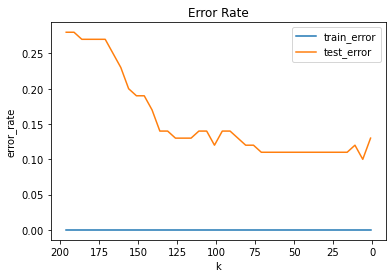

In [302]:
k_list = []
test_error = []
train_error = []
min_k = []
min_error_Euclidean = 1
min_train_error = 1

features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

for k in range(1, 197, 5):
    Euclidean_model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', weights = 'distance')
    Euclidean_model.fit(training_set[features], training_set["class"])
    Euclidean_pred_test = Euclidean_model.predict(testing_set[features])
    Euclidean_pred_train = Euclidean_model.predict(training_set[features])
    
    error_rate_test = 1-accuracy_score(testing_set[["class"]], Euclidean_pred_test)
    error_rate_train = 1-accuracy_score(training_set[["class"]], Euclidean_pred_train)
    k_list.append(k)
    test_error.append(error_rate_test)
    train_error.append(error_rate_train)
    if error_rate_test < min_error_Euclidean:
        min_error_Euclidean = error_rate_test
        min_k = [k]
    elif error_rate_test == min_error_Euclidean:
        min_k.append(k) # may have more than 1 min k.
    if error_rate_train < min_train_error:
        min_train_error = error_rate_train

print('Best k of Euclidean:', min_k)
print('Minimum Test Error Rate:', min_error_Euclidean)
print('Minimum Train Error Rate:', min_train_error)

# plot
plt.title('Error Rate')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(k_list, train_error, label = 'train_error')
plt.plot(k_list, test_error, label = 'test_error')
plt.legend()
plt.show()

Weighted voting with Manhattan distances:

Best k of Manhattan: [26]
Minimum Test Error Rate: 0.09999999999999998
Minimum Train Error Rate: 0.0


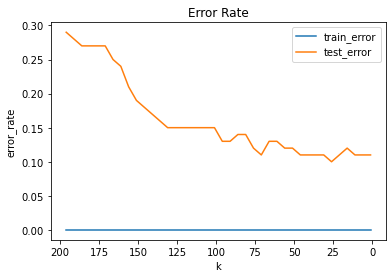

In [303]:
k_list = []
test_error = []
train_error = []
min_k = []
min_error_Manhattan = 1
min_train_error = 1

features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

for k in range(1, 197, 5):
    Manhattan_model = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan', weights='distance')
    Manhattan_model.fit(training_set[features], training_set["class"])
    Manhattan_pred_test = Manhattan_model.predict(testing_set[features])
    Manhattan_pred_train = Manhattan_model.predict(training_set[features])
    
    error_rate_test = 1-accuracy_score(testing_set[["class"]], Manhattan_pred_test)
    error_rate_train = 1-accuracy_score(training_set[["class"]], Manhattan_pred_train)
    k_list.append(k)
    test_error.append(error_rate_test)
    train_error.append(error_rate_train)
    if error_rate_test < min_error_Manhattan:
        min_error_Manhattan = error_rate_test
        min_k = [k]
    elif error_rate_test == min_error_Manhattan:
        min_k.append(k) # may have more than 1 min k.
    if error_rate_train < min_train_error:
        min_train_error = error_rate_train

print('Best k of Manhattan:', min_k)
print('Minimum Test Error Rate:', min_error_Manhattan)
print('Minimum Train Error Rate:', min_train_error)

# plot
plt.title('Error Rate')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(k_list, train_error, label = 'train_error')
plt.plot(k_list, test_error, label = 'test_error')
plt.legend()
plt.show()

Weighted voting with Chebyshev distances:

Best k of Chebyshev: [16, 31, 36, 41, 61]
Minimum Test Error Rate: 0.10999999999999999
Minimum Train Error Rate: 0.0


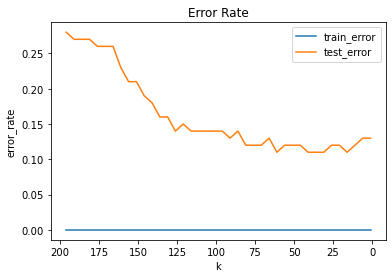

In [304]:
k_list = []
test_error = []
train_error = []
min_k = []
min_error_Chebyshev = 1
min_train_error = 1

features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

for k in range(1, 197, 5):
    Chebyshev_model = KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev', weights='distance')
    Chebyshev_model.fit(training_set[features], training_set["class"])
    Chebyshev_pred_test = Chebyshev_model.predict(testing_set[features])
    Chebyshev_pred_train = Chebyshev_model.predict(training_set[features])
    
    error_rate_test = 1-accuracy_score(testing_set[["class"]], Chebyshev_pred_test)
    error_rate_train = 1-accuracy_score(training_set[["class"]], Chebyshev_pred_train)
    k_list.append(k)
    test_error.append(error_rate_test)
    train_error.append(error_rate_train)
    if error_rate_test < min_error_Chebyshev:
        min_error_Chebyshev = error_rate_test
        min_k = [k]
    elif error_rate_test == min_error_Chebyshev:
        min_k.append(k) # may have more than 1 min k.
    if error_rate_train < min_train_error:
        min_train_error = error_rate_train

print('Best k of Chebyshev:', min_k)
print('Minimum Test Error Rate:', min_error_Chebyshev)
print('Minimum Train Error Rate:', min_train_error)

# plot
plt.title('Error Rate')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(k_list, train_error, label = 'train_error')
plt.plot(k_list, test_error, label = 'test_error')
plt.legend()
plt.show()

Summary for e

In [305]:
e_compare = {'Best Test Error':
             {'Euclidean': min_error_Euclidean, 'Manhattan': min_error_Manhattan, 'Chebyshev': min_error_Chebyshev}}
pd.DataFrame(e_compare)

,Best Test Error
Chebyshev,0.11
Euclidean,0.10
Manhattan,0.10



(f)What is the lowest training error rate you achieved in this homework?

Answer: 0.0